<a href="https://colab.research.google.com/github/manouarn/Covid-data-analysis/blob/main/tccanada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip  "/content/gdrive/My Drive/conutry.zip"

Archive:  /content/gdrive/My Drive/conutry.zip
   creating: conutry/
  inflating: conutry/dfus.csv        
  inflating: conutry/dfuk.csv        
  inflating: conutry/dftr.csv        
  inflating: conutry/dfru.csv        
  inflating: conutry/dfit.csv        
  inflating: conutry/dfir.csv        
  inflating: conutry/dffr.csv        
  inflating: conutry/dfes.csv        
  inflating: conutry/dfde.csv        
  inflating: conutry/dfca.csv        
  inflating: conutry/dfsw.csv        


In [ ]:
import pandas as pd 

In [ ]:
dfca=pd.read_csv('conutry/dfca.csv',parse_dates=True, index_col='created_at',encoding = 'utf8')


In [ ]:
from pandas import Series
def f(x):
     return Series(dict(Number_of_tweets = x['text'].count(), 
                        ))

In [ ]:
daily_count = dfca.groupby(dfca.index.date).apply(f)
print(len(daily_count))

20


In [ ]:
daily_cont_sum=daily_count.cumsum()

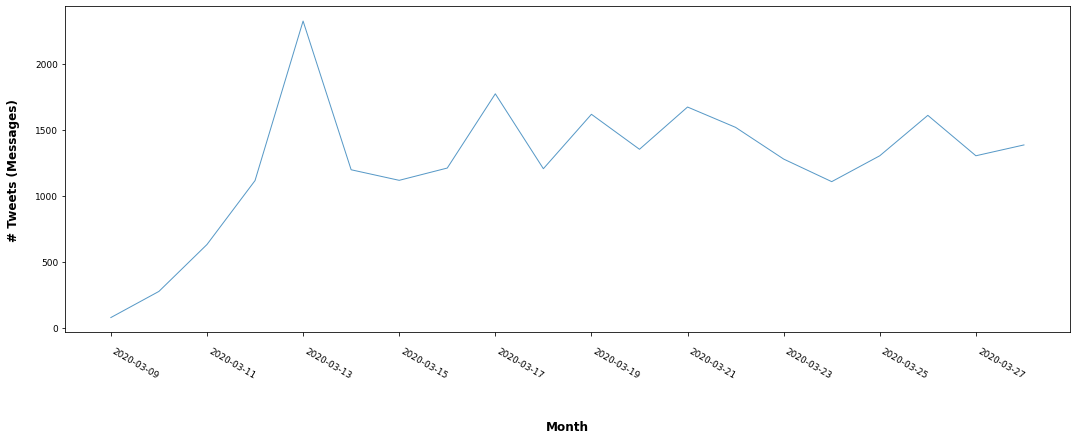

In [ ]:
import IPython.core.display
import matplotlib 

def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles()


from pylab import*

daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Month', weight='bold', labelpad=40)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=10) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')


In [ ]:
daily_cont_sum.Number_of_tweets.max()

25088

In [ ]:
daily_cont_sum.rename(columns={"Number_of_tweets": "tc"},inplace=True)

In [ ]:
 daily_cont_sum.rename(columns={"index": "date"},inplace=True)


In [ ]:
 daily_cont_sum.reset_index(inplace=True)


In [ ]:
 daily_cont_sum.head()


,date,tc
0,2020-03-09,79
1,2020-03-10,356
2,2020-03-11,988
3,2020-03-12,2104
4,2020-03-13,4428


In [ ]:
import datetime as dt

In [ ]:
daily_cont_sum['date']=daily_cont_sum['date'].map(dt.datetime.toordinal)

In [ ]:
daily_cont_sum.head()

,date,tc
0,737493,79
1,737494,356
2,737495,988
3,737496,2104
4,737497,4428


In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm = smf.ols(formula="tc~ date", data=daily_cont_sum).fit()

In [ ]:
lm.params

Intercept   -1.020956e+09
date         1.384358e+03
dtype: float64

In [ ]:
X_new = pd.DataFrame({'date': [20]})

In [ ]:
lm.predict(X_new)

0   -1.020928e+09
dtype: float64

In [ ]:
X_new = pd.DataFrame({'date': [daily_cont_sum.date.min(), daily_cont_sum.date.max()]})
X_new.head()

,date
0,737493
1,737512


In [ ]:
preds = lm.predict(X_new)
preds

0    -1255.9
1    25046.9
dtype: float64

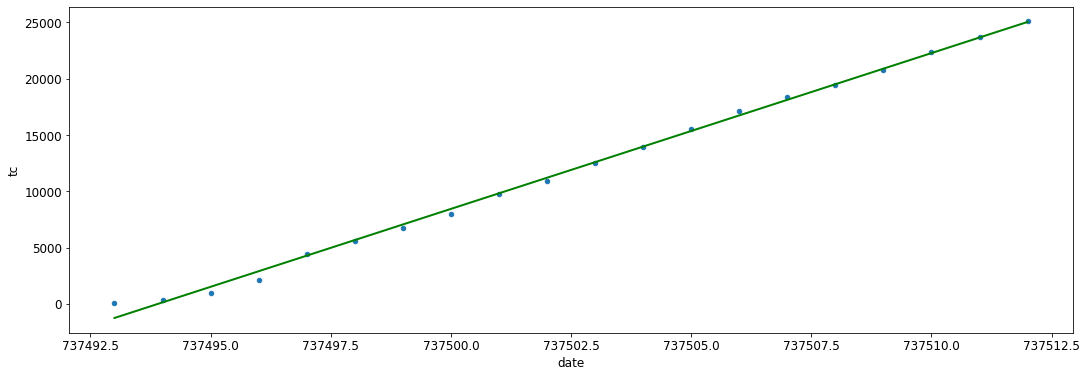

In [ ]:


daily_cont_sum.plot(kind='scatter', x='date', y='tc')
plt.plot(X_new, preds, c='green', linewidth=2)




In [ ]:
!unzip  "/content/gdrive/My Drive/canadacov.zip"

Archive:  /content/gdrive/My Drive/canadacov.zip
  inflating: covid19-1.csv           


In [ ]:
dfcaco=pd.read_csv('covid19-1.csv',index_col='date',parse_dates=True,encoding = 'utf8')


In [ ]:
dfcaco

,pruid,prname,prnameFR,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,deathstoday,testedtoday,recoveredtoday
date,,,,,,,,,,,,,,,,,
2020-01-31,35,Ontario,Ontario,3,0,0.0,3,NaN,NaN,NaN,NaN,3.0,300.0,0.021,0.0,NaN,NaN
2020-01-31,59,British Columbia,Colombie-Britannique,1,0,0.0,1,NaN,NaN,NaN,NaN,1.0,100.0,0.020,0.0,NaN,NaN
2020-01-31,1,Canada,Canada,4,0,0.0,4,NaN,NaN,NaN,NaN,4.0,400.0,0.011,0.0,NaN,NaN
2020-08-02,35,Ontario,Ontario,3,0,0.0,3,NaN,NaN,NaN,NaN,0.0,0.0,0.021,0.0,NaN,NaN
2020-08-02,59,British Columbia,Colombie-Britannique,4,0,0.0,4,NaN,NaN,NaN,NaN,3.0,300.0,0.079,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,60,Yukon,Yukon,11,0,0.0,11,1163.0,11.0,100.00,28467.0,NaN,NaN,26.925,NaN,NaN,NaN
2020-05-28,61,Northwest Territories,Territoires du Nord-Ouest,5,0,0.0,5,1994.0,5.0,100.00,44483.0,NaN,NaN,11.154,NaN,NaN,NaN
2020-05-28,62,Nunavut,Nunavut,0,0,0.0,0,741.0,0.0,NaN,19108.0,NaN,NaN,0.000,NaN,NaN,NaN


In [ ]:
df=dfcaco[dfcaco['prname']=='Canada']

In [ ]:
df.head()

,pruid,prname,prnameFR,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,deathstoday,testedtoday,recoveredtoday
date,,,,,,,,,,,,,,,,,
2020-01-31,1,Canada,Canada,4,0,0.0,4,NaN,NaN,NaN,NaN,4.0,400.00,0.011,0.0,NaN,NaN
2020-08-02,1,Canada,Canada,7,0,0.0,7,NaN,NaN,NaN,NaN,3.0,75.00,0.019,0.0,NaN,NaN
2020-02-16,1,Canada,Canada,8,0,0.0,8,NaN,NaN,NaN,NaN,1.0,14.29,0.021,0.0,NaN,NaN
2020-02-21,1,Canada,Canada,9,0,0.0,9,NaN,NaN,NaN,NaN,1.0,12.50,0.024,0.0,NaN,NaN
2020-02-24,1,Canada,Canada,10,0,0.0,10,NaN,NaN,NaN,NaN,1.0,11.11,0.027,0.0,NaN,NaN


In [ ]:
start_date = '2020-03-09'
end_date = '2020-03-28'

In [ ]:
mask = (df.index > start_date) & (df.index <= end_date)

In [ ]:
df=df.loc[mask]

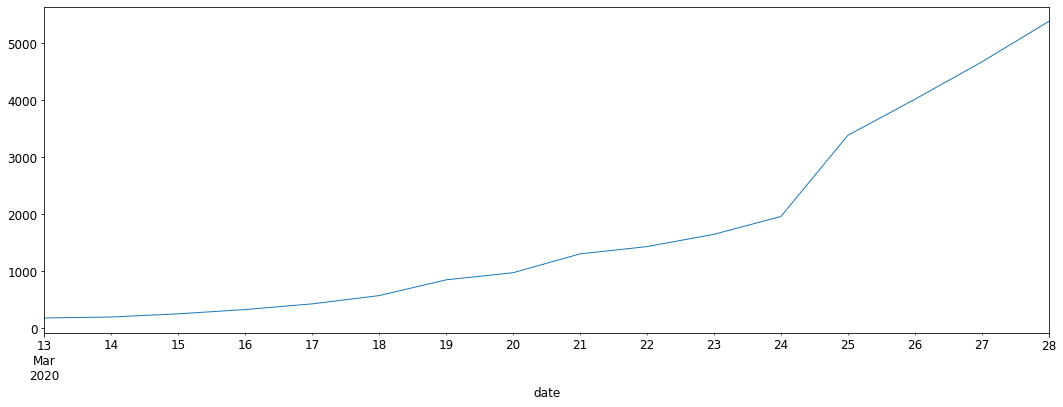

In [ ]:
df['numconf'].plot()


In [ ]:
df.reset_index(inplace=True)


In [ ]:
df['date']=df['date'].map(dt.datetime.toordinal)

In [ ]:
df.head()

,date,pruid,prname,prnameFR,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,deathstoday,testedtoday,recoveredtoday
0,737497,1,Canada,Canada,176,3,2.0,179,15185.0,NaN,NaN,404.0,38.0,26.95,0.476,0.0,0.0,NaN
1,737498,1,Canada,Canada,193,6,2.0,199,22409.0,NaN,NaN,596.0,20.0,11.17,0.529,0.0,7224.0,NaN
2,737499,1,Canada,Canada,249,4,2.0,253,24977.0,NaN,NaN,664.0,54.0,27.14,0.673,0.0,2568.0,NaN
3,737500,1,Canada,Canada,324,17,5.0,341,37730.0,NaN,NaN,1004.0,88.0,34.78,0.907,3.0,12753.0,NaN
4,737501,1,Canada,Canada,424,16,8.0,440,44176.0,NaN,NaN,1175.0,99.0,29.03,1.171,3.0,6446.0,NaN


In [ ]:
df.numconf.max()

5386

In [ ]:
df.rename(columns={"numconf": "tc"},inplace=True)

In [ ]:
lm1 = smf.ols(formula='tc~ date', data=df).fit()

In [ ]:
lm1.params

Intercept   -2.425472e+08
date         3.288779e+02
dtype: float64

In [ ]:
X_new1 = pd.DataFrame({'date': [10]})

In [ ]:
lm1.predict(X_new1)

0   -2.425440e+08
dtype: float64

In [ ]:
X_new1 = pd.DataFrame({'date': [df.date.min(), df.date.max()]})
X_new1.head()

,date
0,737497
1,737512


In [ ]:
preds1 = lm1.predict(X_new1)
preds1

0    -744.522059
1    4188.647059
dtype: float64

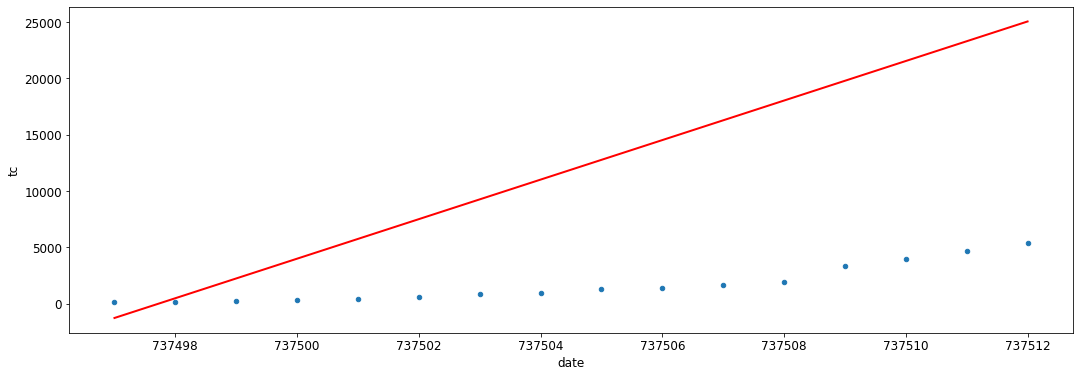

In [ ]:
# first, plot the observed data
df.plot(kind='scatter', x='date', y='tc')

# then, plot the least squares line
plt.plot(X_new1, preds, c='red', linewidth=2)


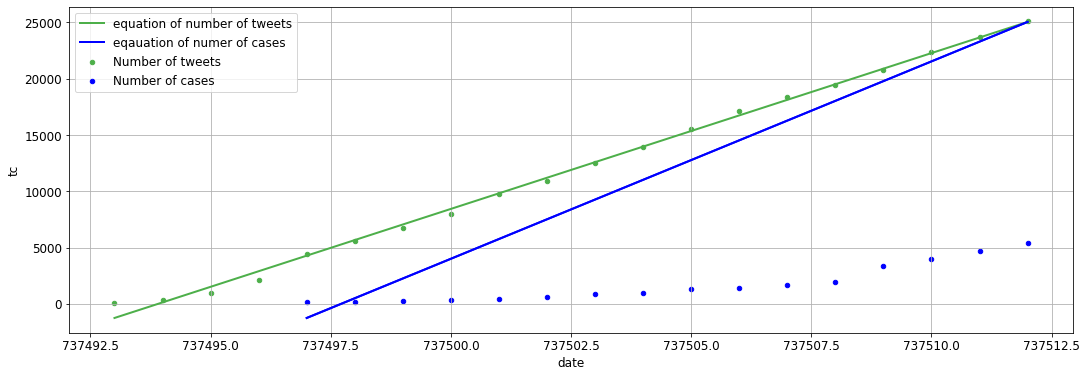

In [ ]:
ax =daily_cont_sum.plot(kind='scatter', x='date', y='tc',c='#4daf4a',label='Number of tweets')



df.plot(ax=ax,kind='scatter', x='date', y='tc',c='blue',label='Number of cases')
plt.plot(X_new, preds, c='#4daf4a', linewidth=2,label='equation of number of tweets')
plt.plot(X_new1, preds, c='blue', linewidth=2,label='eqauation of numer of cases')


plt.plot(X_new1, preds, c='blue', linewidth=2)
plt.grid()
plt.legend()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     tc   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6668.
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.38e-24
Time:                        12:54:14   Log-Likelihood:                -148.93
No. Observations:                  20   AIC:                             301.9
Df Residuals:                      18   BIC:                             303.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.021e+09   1.25e+07    -81.659      0.000   -1.05e+09   -9.95e+08
date        1384.3579     16.953     81.660      0.000    1348.741    1419.974
==============================================================================
Omnibus:                       13.090   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.717
Skew:                           1.166   Prob(JB):                      0.00105
Kurtosis:                       6.321   Cond. No.                     9.43e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm1.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     tc   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     74.30
Date:                Sat, 30 May 2020   Prob (F-statistic):           5.68e-07
Time:                        12:54:25   Log-Likelihood:                -126.53
No. Observations:                  16   AIC:                             257.1
Df Residuals:                      14   BIC:                             258.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.425e+08   2.81e+07     -8.620      0.000   -3.03e+08   -1.82e+08
date         328.8779     38.153      8.620      0.000     247.048     410.708
==============================================================================
Omnibus:                        2.123   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.066
Skew:                           0.209   Prob(JB):                        0.587
Kurtosis:                       1.807   Cond. No.                     1.18e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""